In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
train_acc_fn = 'log/training_acc_iter_genesisgood_run1.csv'
train_loss_fn = 'log/training_loss_iter_genesisgood_run1.csv'
test_acc_fn = 'log/testing_acc_iter_genesisgood_run1.csv'
test_loss_fn = 'log/testing_loss_iter_genesisgood_run1.csv'
n_epochs = 10

In [3]:
def read_csv(fn):
    datapts = []
    with open(fn) as f:
        for line in f:
            datapts.append(np.array([float(f) for f in line.rstrip().split(',')]))
    data = np.vstack(datapts)    
    h, w = data.shape
    n_iters = data[h-1, 0]
    factor = (1.0 * n_epochs) / (1.0 * n_iters)
    data[:, 0] = factor * data[:, 0]
    return data

acc_train = read_csv(train_acc_fn)
acc_test = read_csv(test_acc_fn)
loss_train = read_csv(train_loss_fn)
loss_test = read_csv(test_loss_fn)

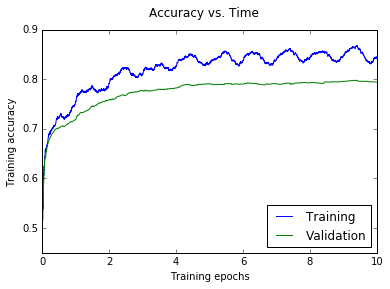

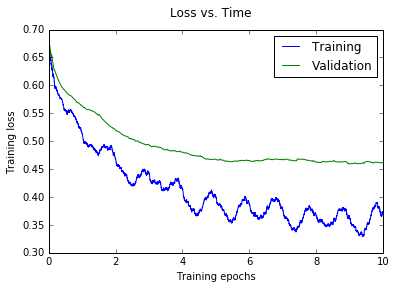

In [4]:
def plot_winavg_all(data, data2, winsize=5, winsize2=5, title='Accuracy vs. Time', xlabel='Training epochs', ylabel='Accuracy', line1='Training', line2='Validation', loc=4):
    def make_smooth(data, winsize):
        smooth = np.zeros_like(data)
        smooth[:, 0] = data[:, 0]
        h, w = data.shape
        for row_id in range(h):
            start = max(row_id - winsize, 0)
            end = min(row_id + 1, h - 1)
            smooth[row_id, 1] = np.mean(data[start:end, 1])
        return smooth
    smooth1 = make_smooth(data, winsize)
    smooth2 = make_smooth(data2, winsize2)
    fig = plt.figure()
    fig.suptitle(title, fontsize=12)
    line1, = plt.plot(smooth1[:,0], smooth1[:,1], label=line1)
    line2, = plt.plot(smooth2[:,0], smooth2[:,1], label=line2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim(0, n_epochs)
    plt.legend(handles=[line1, line2], loc=loc)
    plt.show()

plot_winavg_all(acc_train, acc_test, winsize=400, winsize2=100, title='Accuracy vs. Time', xlabel='Training epochs', ylabel='Training accuracy')
plot_winavg_all(loss_train, loss_test, winsize=400, winsize2=150, title='Loss vs. Time', xlabel='Training epochs', ylabel='Training loss', loc=1)